<a href="https://www.kaggle.com/code/hannadelelegn/speech-emotion-recognition-rf?scriptVersionId=138399413" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
#import librosa.display
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os; 
os.listdir('/kaggle/input')

['ravdess-emotional-speech-audio',
 'cremad',
 'savee-database',
 'surrey-audiovisual-expressed-emotion-savee',
 'toronto-emotional-speech-set-tess']

# LOAD THE DATA

In [3]:
# Paths for data.
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

## Ravdess Data Frame

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


## Crema Data Frame

In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,disgust,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,happy,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,happy,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav


## Tess Data Frame

In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.tail(5)

,Emotions,Path
2795,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2796,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2797,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2798,surprise,/kaggle/input/toronto-emotional-speech-set-tes...
2799,surprise,/kaggle/input/toronto-emotional-speech-set-tes...


## Savee Data Frame

In [7]:


savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
1,fear,/kaggle/input/surrey-audiovisual-expressed-emo...
2,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
3,disgust,/kaggle/input/surrey-audiovisual-expressed-emo...
4,angry,/kaggle/input/surrey-audiovisual-expressed-emo...


## creating Dataframe using all the 4 dataframes we created so far.

In [8]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.sample(5)

,Emotions,Path
2712,fear,/kaggle/input/cremad/AudioWAV/1052_ITH_FEA_XX.wav
148,disgust,/kaggle/input/cremad/AudioWAV/1007_ITH_DIS_XX.wav
171,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
6197,angry,/kaggle/input/cremad/AudioWAV/1079_ITS_ANG_XX.wav
1635,happy,/kaggle/input/cremad/AudioWAV/1083_IWW_HAP_XX.wav


# Visualization

In [9]:
%matplotlib inline

plt.style.use("ggplot")

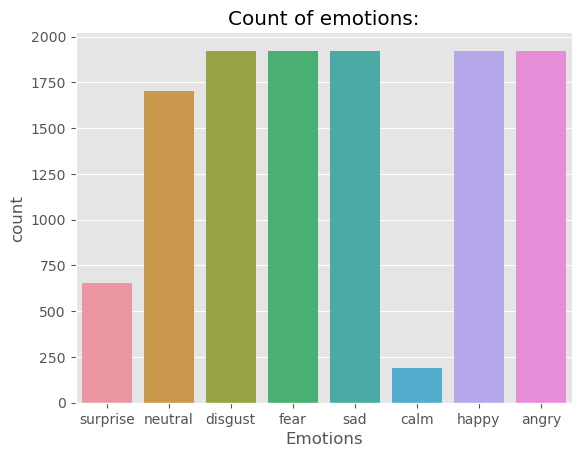

In [10]:
plt.title("Count of emotions:")
sns.countplot(x=data_path["Emotions"])
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [11]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

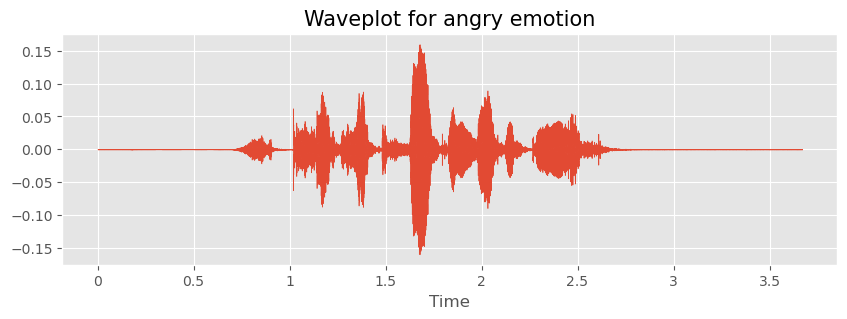

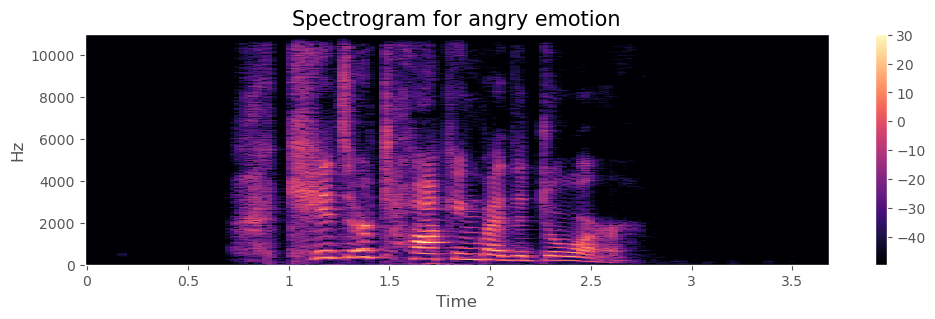

In [12]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion )
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

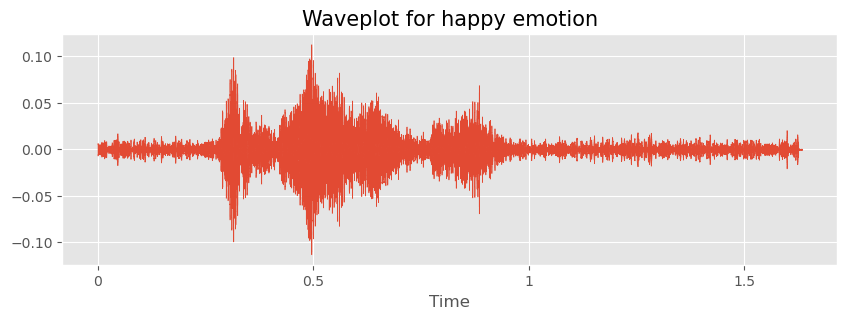

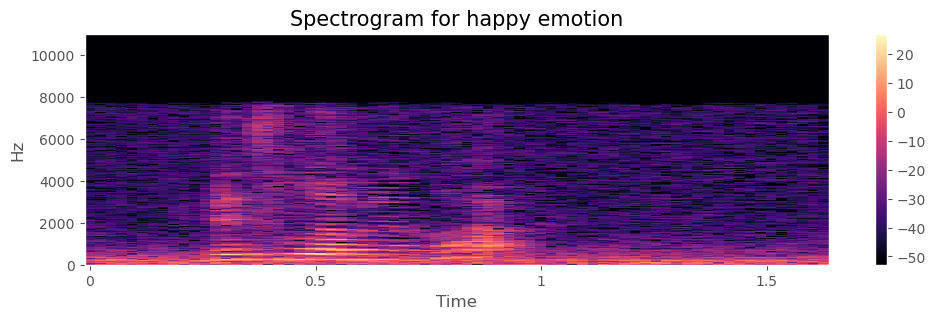

In [13]:
emotion='happy'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion )
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

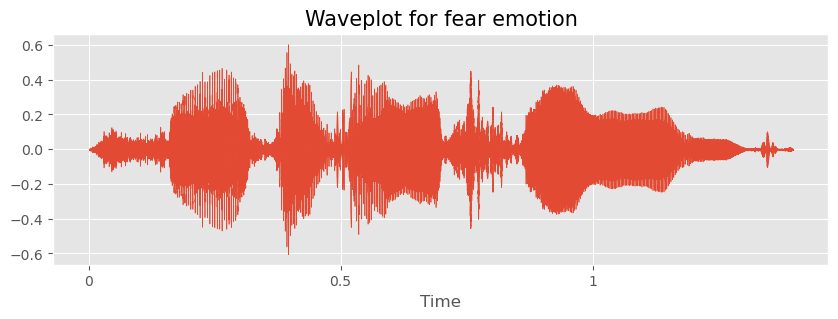

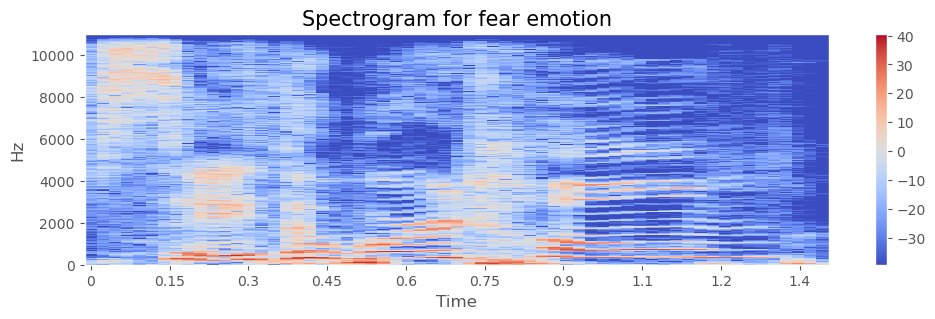

In [14]:
emotion='fear'
path = np.array(Tess_df.Path[Tess_df.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion )
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

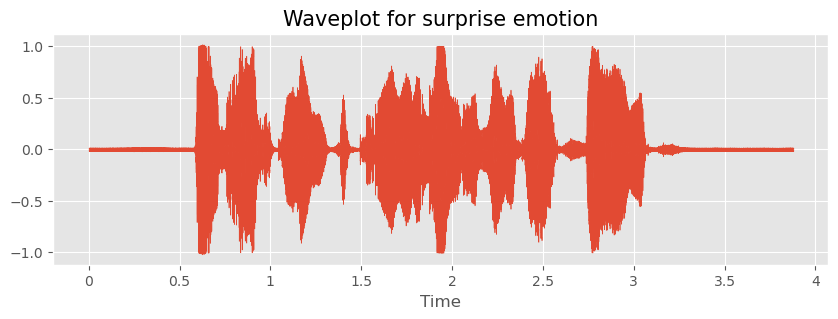

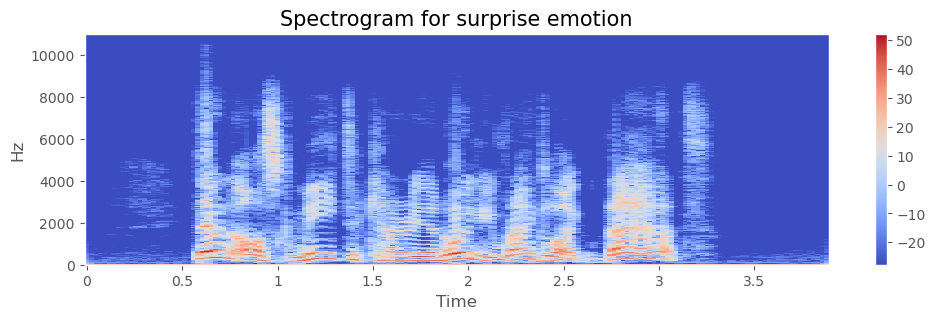

In [15]:
emotion='surprise'
path = np.array(Savee_df.Path[Savee_df.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion )
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# DATA PREPROCESSING

In [16]:
data_path.isnull().sum()

Emotions    0
Path        0
dtype: int64

# Augementation

In [17]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    """Add some noise to sound sample. Use random if you want to add random noise with some threshold.
    Or use rate Random=False and rate for always adding fixed noise."""
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def shift(data, rate=1000):
    """Shifting data with some rate"""
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)



In [18]:
path = path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav"
data, sample_rate = librosa.load(path)


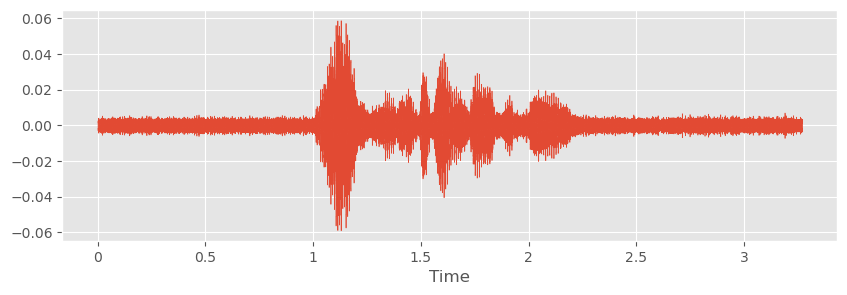

In [19]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveshow(y=x, sr=sample_rate)

Audio(x, rate=sample_rate)

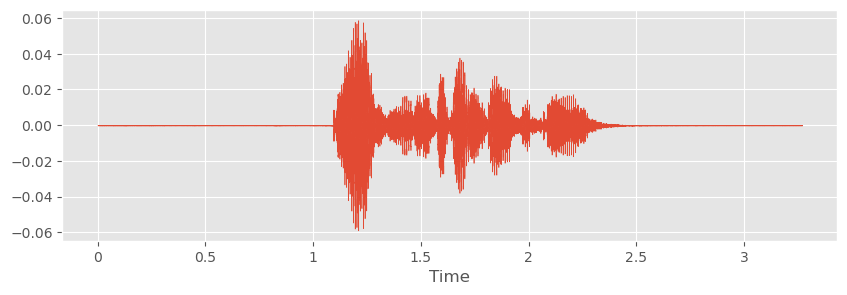

In [20]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Feature Extraction

In [21]:
n_fft = 2048
hop_length = 512

In [22]:

def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)


def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)


def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
   
        mfccs=np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=39).T, axis=0)
        result=np.hstack((mfccs))
        return result

In [23]:
path = np.array(data_path["Path"])[658]
data, sampling_rate = librosa.load(path, duration=2.5, offset=0.6)
len(data)

55125

In [24]:
print("ZCR: ", zcr(data).shape)
print("RMS :", rmse(data).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)


ZCR:  (108,)
RMS : (108,)
MFCC:  (39,)


In [25]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                  
                        rmse(data, frame_length, hop_length),
                       
                        mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result

In [26]:
def get_features(path, duration=2.5, offset=0.6):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

     # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data, random=True)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    

    return result

In [27]:
X, Y = [], []
print("Feature processing...")
for path, emotion, ind in zip(data_path.Path, data_path.Emotions, range(data_path.Path.shape[0])):
    features = get_features(path)
    if ind % 500 == 0:
        print(f"{ind} samples has been processed...")
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
print("Done.")

Feature processing...
0 samples has been processed...
500 samples has been processed...
1000 samples has been processed...
1500 samples has been processed...
2000 samples has been processed...
2500 samples has been processed...
3000 samples has been processed...
3500 samples has been processed...
4000 samples has been processed...
4500 samples has been processed...
5000 samples has been processed...
5500 samples has been processed...
6000 samples has been processed...
6500 samples has been processed...
7000 samples has been processed...
7500 samples has been processed...
8000 samples has been processed...
8500 samples has been processed...
9000 samples has been processed...
9500 samples has been processed...
10000 samples has been processed...
10500 samples has been processed...
11000 samples has been processed...
11500 samples has been processed...
12000 samples has been processed...
Done.


In [28]:
features_path = "./features.csv"

In [29]:
extracted_df = pd.DataFrame(X)
extracted_df["labels"] = Y
extracted_df.to_csv(features_path, index=False)
extracted_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,labels
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,4.770746,5.517719,0.057942,3.322681,2.238612,5.655242,0.292540,2.936671,1.227493,surprise
1,0.250977,0.371094,0.493652,0.499023,0.501465,0.500000,0.494629,0.497070,0.486816,0.487793,...,3.586189,1.163913,0.212897,0.612870,1.338618,2.561350,0.979092,0.653962,0.568245,surprise
2,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,0.170820,4.441108,2.811377,6.189663,3.232297,3.908473,-2.468603,1.892174,-1.434031,neutral
3,0.252930,0.380859,0.515137,0.505371,0.499023,0.489746,0.477051,0.477051,0.483398,0.486816,...,1.027619,2.929404,3.268143,4.460458,3.821066,2.677312,-0.137430,0.573997,0.005545,neutral
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.063477,0.176758,0.176758,0.254883,0.365723,...,1.084125,5.413248,1.994500,2.695452,-1.055933,1.135722,-1.021920,1.442784,-0.813216,disgust


In [30]:
print(extracted_df.shape)

(24324, 256)


In [31]:
extracted_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
count,24324.000000,24324.000000,24324.000000,24324.000000,24324.000000,24324.000000,24324.000000,24324.000000,24324.000000,24324.000000,...,6134.000000,6134.000000,5876.000000,5876.000000,5692.000000,5692.000000,5680.000000,5680.000000,5512.000000,5512.000000
mean,0.067777,0.101364,0.134676,0.133521,0.132713,0.132167,0.131758,0.131605,0.131943,0.132355,...,0.976616,0.599185,0.965494,1.234955,1.130493,1.336527,1.069055,1.314840,0.674074,0.626880
std,0.078342,0.115284,0.150805,0.149476,0.148209,0.147524,0.147317,0.147085,0.147199,0.147719,...,3.149682,3.022765,3.347107,3.227985,3.413677,3.124764,3.351612,3.040701,3.081662,2.835582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.581408,-11.714474,-8.410358,-7.650492,-7.337824,-8.078626,-9.321932,-8.720798,-8.369340,-7.680382
25%,0.019531,0.029785,0.041016,0.041016,0.041504,0.041504,0.041992,0.042480,0.042969,0.042969,...,-1.094986,-1.281140,-1.237337,-0.897570,-1.084647,-0.702896,-0.971786,-0.649325,-1.272143,-1.229334
50%,0.031250,0.047852,0.065430,0.065430,0.066406,0.066895,0.067383,0.067383,0.068848,0.068848,...,0.342157,0.262578,0.379631,0.841595,0.538252,1.051848,0.766839,1.032085,0.429928,0.519314
75%,0.078613,0.117188,0.155273,0.152344,0.149414,0.148926,0.145996,0.144165,0.143555,0.144043,...,2.515560,2.097313,2.531564,3.043077,2.771615,3.050207,2.740552,2.983304,2.239710,2.192816
max,0.461914,0.686035,0.916504,0.922852,0.920410,0.923828,0.921387,0.930176,0.931641,0.897461,...,24.970566,21.769333,25.969908,21.490959,17.979710,22.565102,25.254829,28.777771,25.460732,16.490303


In [32]:
extracted_df.corr

<bound method DataFrame.corr of               0         1         2         3         4         5         6  \
0      0.343750  0.479492  0.573730  0.458008  0.375488  0.301758  0.269043   
1      0.250977  0.371094  0.493652  0.499023  0.501465  0.500000  0.494629   
2      0.437500  0.659668  0.862305  0.878906  0.865234  0.847168  0.845703   
3      0.252930  0.380859  0.515137  0.505371  0.499023  0.489746  0.477051   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.063477  0.176758   
...         ...       ...       ...       ...       ...       ...       ...   
24319  0.008301  0.018555  0.029297  0.037109  0.036133  0.029785  0.021484   
24320  0.021973  0.032227  0.042969  0.041504  0.039551  0.037109  0.031738   
24321  0.021973  0.032227  0.042969  0.041504  0.042480  0.041992  0.038574   
24322  0.023926  0.035156  0.040527  0.035645  0.032715  0.029297  0.032715   
24323  0.023926  0.039062  0.053223  0.048340  0.045410  0.038086  0.032715   

              7    

In [33]:
# Fill NaN with 0
extracted_df = extracted_df.fillna(0)
print(extracted_df.isna().any())
extracted_df.shape


0         False
1         False
2         False
3         False
4         False
          ...  
251       False
252       False
253       False
254       False
labels    False
Length: 256, dtype: bool


(24324, 256)

In [34]:
extracted_df.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
            246,      247,      248,      249,      250,      251,      252,
            253,      254, 'labels'],
      dtype='object', length=256)

In [35]:
extracted_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,labels
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,4.770746,5.517719,0.057942,3.322681,2.238612,5.655242,0.292540,2.936671,1.227493,surprise
1,0.250977,0.371094,0.493652,0.499023,0.501465,0.500000,0.494629,0.497070,0.486816,0.487793,...,3.586189,1.163913,0.212897,0.612870,1.338618,2.561350,0.979092,0.653962,0.568245,surprise
2,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,0.170820,4.441108,2.811377,6.189663,3.232297,3.908473,-2.468603,1.892174,-1.434031,neutral
3,0.252930,0.380859,0.515137,0.505371,0.499023,0.489746,0.477051,0.477051,0.483398,0.486816,...,1.027619,2.929404,3.268143,4.460458,3.821066,2.677312,-0.137430,0.573997,0.005545,neutral
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.063477,0.176758,0.176758,0.254883,0.365723,...,1.084125,5.413248,1.994500,2.695452,-1.055933,1.135722,-1.021920,1.442784,-0.813216,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24319,0.008301,0.018555,0.029297,0.037109,0.036133,0.029785,0.021484,0.013672,0.013184,0.019043,...,-2.324323,0.654538,0.209319,1.043327,1.516079,-1.162711,1.109412,2.303563,2.733147,neutral
24320,0.021973,0.032227,0.042969,0.041504,0.039551,0.037109,0.031738,0.025391,0.020020,0.021973,...,-1.812625,-2.542389,-3.422593,-2.677112,-0.705195,-2.555390,-1.961954,-0.671839,-3.290840,angry
24321,0.021973,0.032227,0.042969,0.041504,0.042480,0.041992,0.038574,0.036133,0.027832,0.030762,...,-2.012106,-2.500396,-2.872182,-2.893166,-1.105413,-1.100902,-0.732200,-1.271874,-2.592774,angry
24322,0.023926,0.035156,0.040527,0.035645,0.032715,0.029297,0.032715,0.048340,0.125488,0.214844,...,-2.221648,-2.187500,-2.997938,-0.116902,-0.788892,-2.721042,1.208017,1.580997,-0.036147,happy


## Feature and target

In [36]:
X = extracted_df.drop(labels="labels", axis=1)
Y = extracted_df["labels"]

In [37]:
X.shape, Y.shape

((24324, 255), (24324,))

In [38]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Feature selection

In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize a random forest classifier
rf = RandomForestClassifier()

# Fit the random forest classifier to obtain feature importances
rf.fit(X, Y)

# Get the feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top  features
top_feature_indices = sorted_indices[:40]

# Get the selected feature names
selected_feature_names = X.columns[top_feature_indices]

# Select only the top features in the dataset
X_selected = X[selected_feature_names]

In [40]:
X_selected.shape

(24324, 40)

# Model build Random Forest

In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=100)

# Train the random forest classifier on the selected features
rf_selected = RandomForestClassifier()
rf_selected.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_selected.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6875642343268242


In [42]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       angry       0.79      0.68      0.73       890
        calm       0.71      0.52      0.60       103
     disgust       0.67      0.65      0.66       783
        fear       0.57      0.77      0.66       567
       happy       0.67      0.65      0.66       781
     neutral       0.70      0.71      0.71       686
         sad       0.73      0.68      0.71       819
    surprise       0.66      0.77      0.71       236

    accuracy                           0.69      4865
   macro avg       0.69      0.68      0.68      4865
weighted avg       0.70      0.69      0.69      4865



In [43]:
labels = ['angry'  , 'calm' , 'disgust' , 'fear', 'happy' , 'neutral',  ' sad'   ,'surprise']
cm1 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = labels, columns = labels)

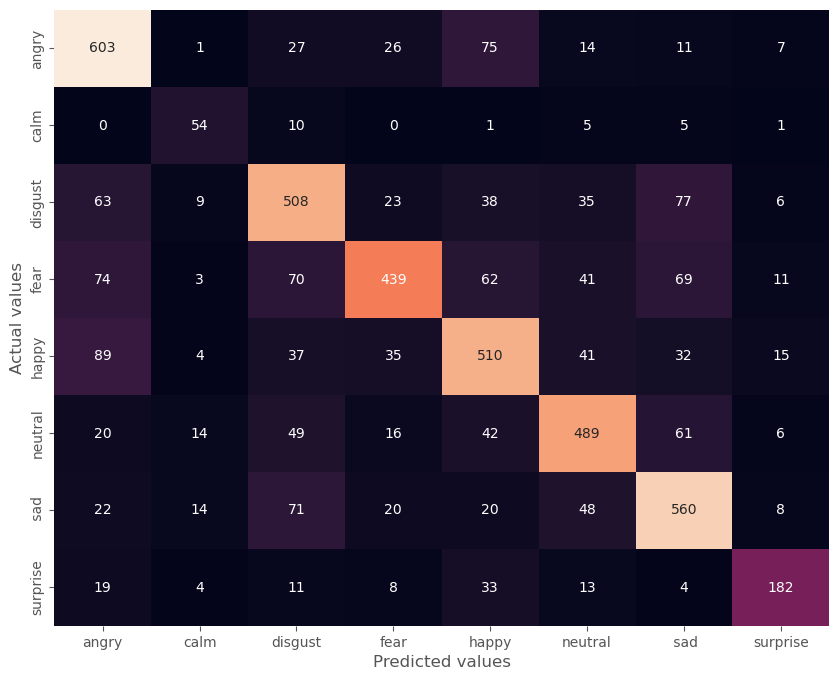

In [44]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

# model without feature selection

In [45]:
from sklearn.svm import SVC
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the random forest classifier on the selected features
svm = SVC()
svm.fit(X_train, y_train)

# Predict the labels for the test set
svm_pred = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy:", accuracy)

Accuracy: 0.36813977389516955


In [46]:
print(classification_report(svm_pred, y_test))

              precision    recall  f1-score   support

       angry       0.51      0.45      0.48       887
        calm       0.73      0.31      0.44       181
     disgust       0.47      0.32      0.38      1183
        fear       0.20      0.41      0.27       394
       happy       0.39      0.34      0.36       848
     neutral       0.30      0.35      0.33       562
         sad       0.40      0.38      0.39       797
    surprise       0.03      0.62      0.06        13

    accuracy                           0.37      4865
   macro avg       0.38      0.40      0.34      4865
weighted avg       0.42      0.37      0.38      4865



In [47]:
labels = ['angry'  , 'calm' , 'disgust' , 'fear', 'happy' , 'neutral',  ' sad'   ,'surprise']
cm1 = pd.DataFrame(confusion_matrix(y_test, svm_pred), index = labels, columns = labels)

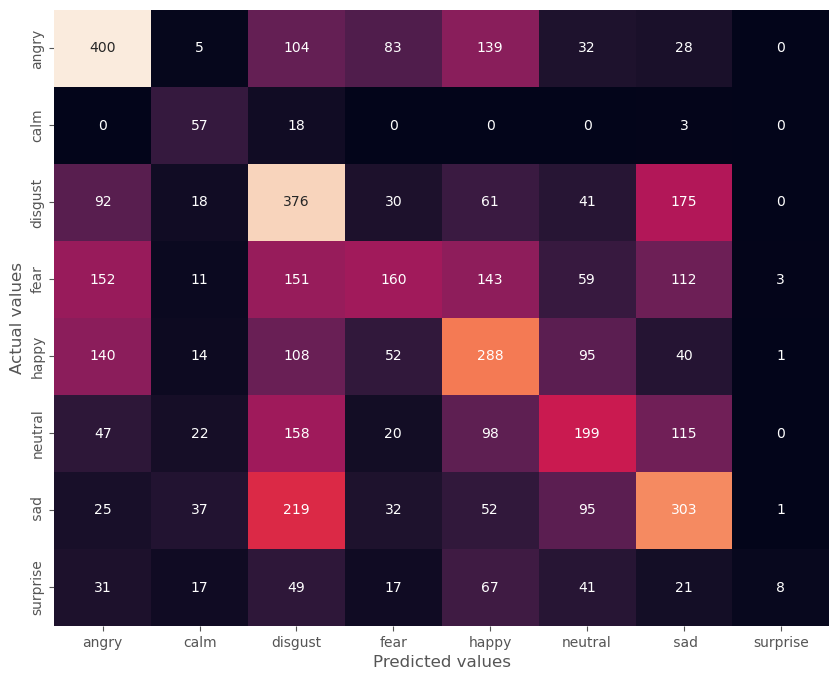

In [48]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

# model with feature selction

In [49]:
from sklearn.tree import DecisionTreeClassifier
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

# Train the random forest classifier on the selected features
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict the labels for the test set
dec_pred = dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, dec_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5151079136690647


In [50]:
labels = ['angry'  , 'calm' , 'disgust' , 'fear', 'happy' , 'neutral',  ' sad'   ,'surprise']
cm1 = pd.DataFrame(confusion_matrix(y_test, dec_pred), index = labels, columns = labels)

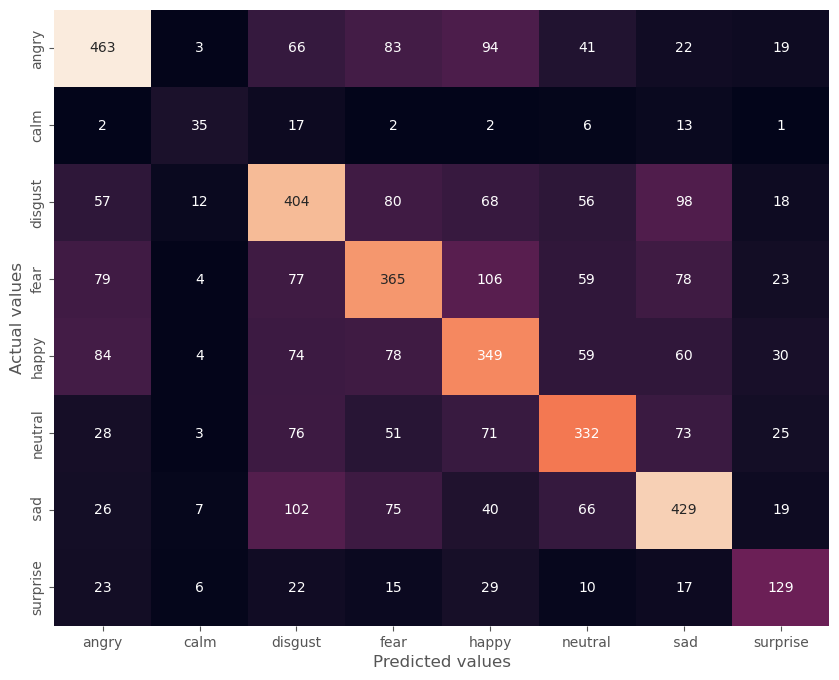

In [51]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

# Exiperment done on other feature selection

In [52]:
from sklearn.decomposition import PCA

# Assuming you have a feature matrix 'X' of shape (n_samples, n_features)
# where each row represents a sample and each column represents a feature

# Create an instance of PCA with the desired number of components
n_components = 40  # Specify the number of principal components
pca = PCA(n_components=n_components)

# Fit the PCA model to your feature matrix
pca.fit(X)

# Transform the feature matrix to the lower-dimensional space
X_pca = pca.transform(X)

# Access the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

# You can also access the principal components themselves
principal_components = pca.components_

# Now you can use the transformed feature matrix 'X_pca' for further analysis
# such as training a classifier for speech emotion recognition


Cumulative explained variance ratio: [0.22796868 0.25118343 0.2737163  0.29593061 0.31773686 0.33876949
 0.35947181 0.37991114 0.40009752 0.42008749 0.43992862 0.45960138
 0.47891718 0.49818346 0.51742718 0.53612659 0.55442998 0.57240796
 0.59032543 0.60793955 0.62550279 0.64264108 0.65887759 0.67437586
 0.68857576 0.70228489 0.71532527 0.72788616 0.73988674 0.75168801
 0.76341377 0.77474041 0.78552001 0.79557016 0.80532    0.81486088
 0.82425923 0.83339493 0.84208327 0.85026245]


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming you have corresponding emotion labels 'y' for your samples
# where 'y' is a 1D array or list of length 'n_samples'

# Split the transformed feature matrix and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# Create an instance of a classifier, such as Support Vector Machine (SVM)
classifier = SVC()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Predict the emotion labels for the testing data
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.2922918807810894


In [54]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply ANOVA F-value feature selection
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Initialize a machine learning model
model = SVC()

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_selected)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)


In [55]:
accuracy

0.19177800616649537

In [56]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
k = 5  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [58]:
model = SVC()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.19054470709146967

In [59]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [60]:
X_shifted = X - np.min(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_shifted, Y, test_size=0.2, random_state=42)
k = 5  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
model = SVC()


In [62]:
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.1948612538540596

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [64]:
lda = LinearDiscriminantAnalysis(n_components=7)
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [65]:

model = SVC()
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)


In [66]:
accuracy

0.3960945529290853

## By Hanna Delelegn and Biruk Addisalem

# References
1. https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition
2. https://www.kaggle.com/code/ritzing/speech-emotion-recognition-with-cnn
3. https://www.kaggle.com/code/amitkrjha/speech-emotion-recognition